## Clean Slate for Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import index_natsorted

In [2]:
# import the data
filename = '/data1/msazizan/gatk-workflow/plotting/output-files/combined_matrix/AHR_AHR_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'AHR_AHR_HUMAN.H11MO.0.B'

In [3]:
matrix_afps

,Chromosome,Start,End,98JKPD8_lumA_fps,ANAB5F7_basal_fps,S6R691V_her2_fps,PU24GB8_lumB_fps,2GAMBDQ_norm_fps,2GAMBDQ_norm_varsite_pos,2GAMBDQ_norm_ref_allele,...,ANAB5F7_basal_AF,PU24GB8_lumB_varsite_pos,PU24GB8_lumB_ref_allele,PU24GB8_lumB_alt_allele,PU24GB8_lumB_AF,S6R691V_her2_varsite_pos,S6R691V_her2_ref_allele,S6R691V_her2_alt_allele,S6R691V_her2_AF,region_id
0,chr1,1123504,1123513,0.05947,0.04279,0.07126,0.06663,0.05112,1123509.0,G,...,0.147059,1123509.0,G,A,0.105263,1123509.0,G,A,0.147059,chr1:1123504-1123513
1,chr1,1334103,1334112,0.05859,0.06470,0.08115,0.05821,0.05157,NaN,NaN,...,0.058824,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,chr1:1334103-1334112
2,chr1,1518493,1518502,0.02580,0.02505,0.02546,0.02915,0.02791,NaN,NaN,...,0.000000,1518498.0,G,A,0.055556,NaN,NaN,NaN,0.000000,chr1:1518493-1518502
3,chr1,1630559,1630568,0.05616,0.04834,0.08547,0.08601,0.05275,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1630564.0,C,T,0.029412,chr1:1630559-1630568
4,chr1,1759468,1759477,0.16979,0.09339,0.16180,0.16180,0.09600,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,chr1:1759468-1759477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,chrX,119404512,119404521,0.01047,0.01354,0.02048,0.01657,0.01535,NaN,NaN,...,0.000000,119404513.0,G,A,0.027778,NaN,NaN,NaN,0.000000,chrX:119404512-119404521
2582,chrX,143634790,143634799,0.02771,0.03047,0.02661,0.04590,0.04830,143634794.0,C,...,0.125000,143634794.0,C,G,0.088235,143634794.0,C,G,0.218750,chrX:143634790-143634799
2583,chrX,149471614,149471623,0.01889,0.03416,0.01712,0.01322,0.02623,NaN,NaN,...,0.000000,149471620.0,C,T,0.029412,NaN,NaN,NaN,0.000000,chrX:149471614-149471623
2584,chrX,152930685,152930694,0.02136,0.02227,0.02478,0.03098,0.01900,152930689.0,C,...,0.600000,152930689.0,C,T,0.750000,152930689.0,C,T,0.593750,chrX:152930685-152930694


In [4]:
matrix_afps = matrix_afps.filter(regex='_AF$|_fps$|_id$')
matrix_afps

,98JKPD8_lumA_fps,ANAB5F7_basal_fps,S6R691V_her2_fps,PU24GB8_lumB_fps,2GAMBDQ_norm_fps,2GAMBDQ_norm_AF,98JKPD8_lumA_AF,ANAB5F7_basal_AF,PU24GB8_lumB_AF,S6R691V_her2_AF,region_id
0,0.05947,0.04279,0.07126,0.06663,0.05112,0.3125,0.166667,0.147059,0.105263,0.147059,chr1:1123504-1123513
1,0.05859,0.06470,0.08115,0.05821,0.05157,0.0000,0.000000,0.058824,0.000000,0.000000,chr1:1334103-1334112
2,0.02580,0.02505,0.02546,0.02915,0.02791,0.0000,0.000000,0.000000,0.055556,0.000000,chr1:1518493-1518502
3,0.05616,0.04834,0.08547,0.08601,0.05275,0.0000,0.000000,0.000000,0.000000,0.029412,chr1:1630559-1630568
4,0.16979,0.09339,0.16180,0.16180,0.09600,0.0000,0.041667,0.000000,0.000000,0.000000,chr1:1759468-1759477
...,...,...,...,...,...,...,...,...,...,...,...
2581,0.01047,0.01354,0.02048,0.01657,0.01535,0.0000,0.000000,0.000000,0.027778,0.000000,chrX:119404512-119404521
2582,0.02771,0.03047,0.02661,0.04590,0.04830,0.5000,0.090909,0.125000,0.088235,0.218750,chrX:143634790-143634799
2583,0.01889,0.03416,0.01712,0.01322,0.02623,0.0000,0.000000,0.000000,0.029412,0.000000,chrX:149471614-149471623
2584,0.02136,0.02227,0.02478,0.03098,0.01900,0.3750,0.409091,0.600000,0.750000,0.593750,chrX:152930685-152930694


In [5]:
# convert to long format
matrix_afps_long = matrix_afps.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
matrix_afps_long[['sample_id', 'type']] = matrix_afps_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
matrix_afps_long = matrix_afps_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
matrix_afps_lpv = matrix_afps_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
matrix_afps_lpv = matrix_afps_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
matrix_afps_lpv = matrix_afps_lpv.reindex(index=index_natsorted(matrix_afps_lpv['region_id']))
matrix_afps_lpv = matrix_afps_lpv.reset_index(drop=True)
matrix_afps_lpv


,region_id,sample_id,AF,FPS
0,chr1:1123504-1123513,2GAMBDQ_norm,0.312500,0.05112
1,chr1:1123504-1123513,98JKPD8_lumA,0.166667,0.05947
2,chr1:1123504-1123513,ANAB5F7_basal,0.147059,0.04279
3,chr1:1123504-1123513,PU24GB8_lumB,0.105263,0.06663
4,chr1:1123504-1123513,S6R691V_her2,0.147059,0.07126
...,...,...,...,...
12925,chrX:153803230-153803239,2GAMBDQ_norm,0.000000,0.01664
12926,chrX:153803230-153803239,98JKPD8_lumA,0.000000,0.01560
12927,chrX:153803230-153803239,ANAB5F7_basal,0.000000,0.01948
12928,chrX:153803230-153803239,PU24GB8_lumB,0.000000,0.01863


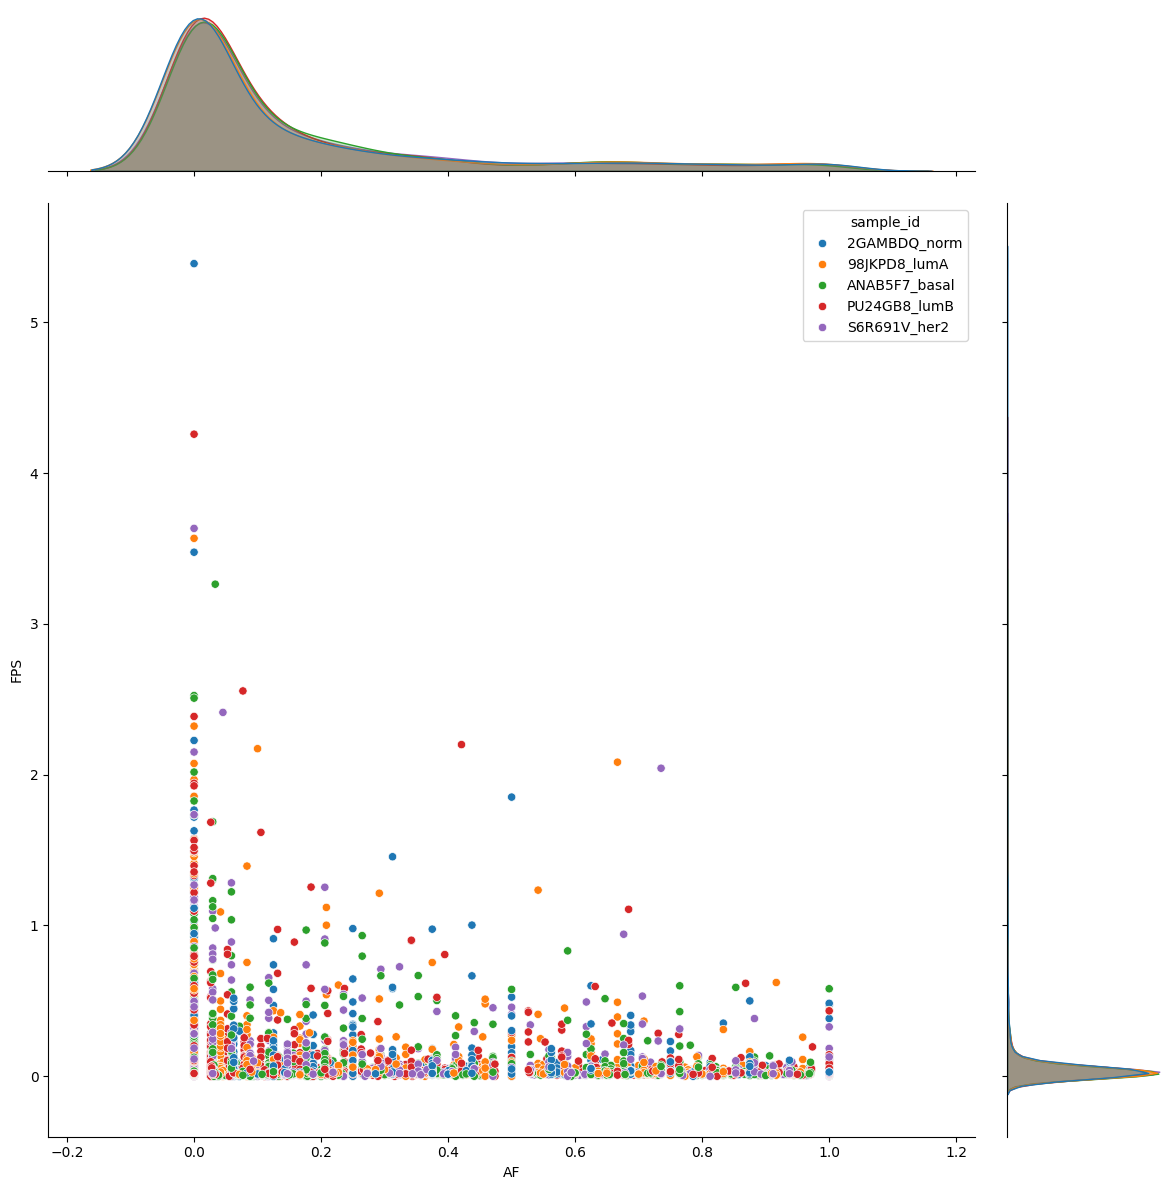

In [6]:
sns.jointplot(x="AF", y="FPS", data=matrix_afps_lpv, hue='sample_id', height=12)
plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/unfilt-scatterplots/{motif_id}_afps-jointplot-unfilt.png', dpi=300, bbox_inches='tight')

Now, we can plot a stacked bar plot with the bars sorted based on the total AF values across subtypes.

In [7]:
# subset the first 100 rows of the dataframe
# matrix_afps_longpivot_subset = matrix_afps_longpivot.head(100)

# Calculate the cumulative 'AF' for each 'region_id'
cumulative_af = matrix_afps_lpv.groupby('region_id')['AF'].sum().reset_index().rename(columns={'AF': 'cumulative_AF'})

# set the index to 'region_id' and then sort the dataframe by 'AF' in descending order
cumulative_af = cumulative_af.set_index('region_id').sort_values(by='cumulative_AF', ascending=False)
cumulative_af

,cumulative_AF
region_id,
chr9:92021802-92021811,5.0
chr7:102132322-102132331,5.0
chr21:26170921-26170930,5.0
chr13:27152347-27152356,5.0
chr15:26057020-26057029,5.0
...,...
chr9:136697516-136697525,0.0
chr10:14625250-14625259,0.0
chr10:3399603-3399612,0.0


We can now reorder the original matrix based on the region_id index order in the sorted cumulative_AF dataframe above. 

In [8]:
with pd.option_context('mode.chained_assignment', None):
    # Create a categorical variable with ordered categories
	matrix_afps_lpv['region_id'] = pd.Categorical(matrix_afps_lpv['region_id'], categories=cumulative_af.index.unique(), ordered=True)

	# Sort by the categorical 'region_id'
	matrix_afps_lpv = matrix_afps_lpv.sort_values('region_id')

matrix_afps_lpv

,region_id,sample_id,AF,FPS
6739,chr9:92021802-92021811,S6R691V_her2,1.0,0.00527
6737,chr9:92021802-92021811,ANAB5F7_basal,1.0,0.00649
6736,chr9:92021802-92021811,98JKPD8_lumA,1.0,0.01087
6735,chr9:92021802-92021811,2GAMBDQ_norm,1.0,0.01295
6738,chr9:92021802-92021811,PU24GB8_lumB,1.0,0.00759
...,...,...,...,...
4472,chr6:63163495-63163504,ANAB5F7_basal,0.0,0.01069
4471,chr6:63163495-63163504,98JKPD8_lumA,0.0,0.01920
4470,chr6:63163495-63163504,2GAMBDQ_norm,0.0,0.01484
4474,chr6:63163495-63163504,S6R691V_her2,0.0,0.00937


Next, sort the sample_id values per each unique region_id by a specific order. This order is based on the lexicographic order of the sample_id values in the original matrix.

In [9]:
# get unique sample_id values into a list to define a categorical order
datasets = matrix_afps_lpv['sample_id'].unique().tolist()
datasets = sorted(datasets)

# Create a categorical variable with ordered categories
matrix_afps_lpv['sample_id'] = pd.Categorical(matrix_afps_lpv['sample_id'], categories=datasets, ordered=True)

# Sort 'sample_id' within each 'region_id'
matrix_afps_regsorted = matrix_afps_lpv.groupby('region_id', sort=False, observed=False).apply(lambda x: x.sort_values('sample_id')).reset_index(drop=True)

matrix_afps_regsorted

,region_id,sample_id,AF,FPS
0,chr9:92021802-92021811,2GAMBDQ_norm,1.0,0.01295
1,chr9:92021802-92021811,98JKPD8_lumA,1.0,0.01087
2,chr9:92021802-92021811,ANAB5F7_basal,1.0,0.00649
3,chr9:92021802-92021811,PU24GB8_lumB,1.0,0.00759
4,chr9:92021802-92021811,S6R691V_her2,1.0,0.00527
...,...,...,...,...
12925,chr6:63163495-63163504,2GAMBDQ_norm,0.0,0.01484
12926,chr6:63163495-63163504,98JKPD8_lumA,0.0,0.01920
12927,chr6:63163495-63163504,ANAB5F7_basal,0.0,0.01069
12928,chr6:63163495-63163504,PU24GB8_lumB,0.0,0.00952


In [20]:
# generate a bar chart of the top 25 regions
# load file
test_df = pd.read_csv('/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/test.txt', sep='\t')
test_df

,region_id,sample_id,AF,FPS
0,chr9:92021802-92021811,2GAMBDQ_norm,1.0,0.01295
1,chr9:92021802-92021811,98JKPD8_lumA,1.0,0.01087
2,chr9:92021802-92021811,ANAB5F7_basal,1.0,0.00649
3,chr9:92021802-92021811,PU24GB8_lumB,1.0,0.00759
4,chr9:92021802-92021811,S6R691V_her2,1.0,0.00527
5,chr7:102132322-102132331,2GAMBDQ_norm,1.0,0.02738
6,chr7:102132322-102132331,98JKPD8_lumA,1.0,0.01419
7,chr7:102132322-102132331,ANAB5F7_basal,1.0,0.03612
8,chr7:102132322-102132331,PU24GB8_lumB,1.0,0.02015
9,chr7:102132322-102132331,S6R691V_her2,1.0,0.02507


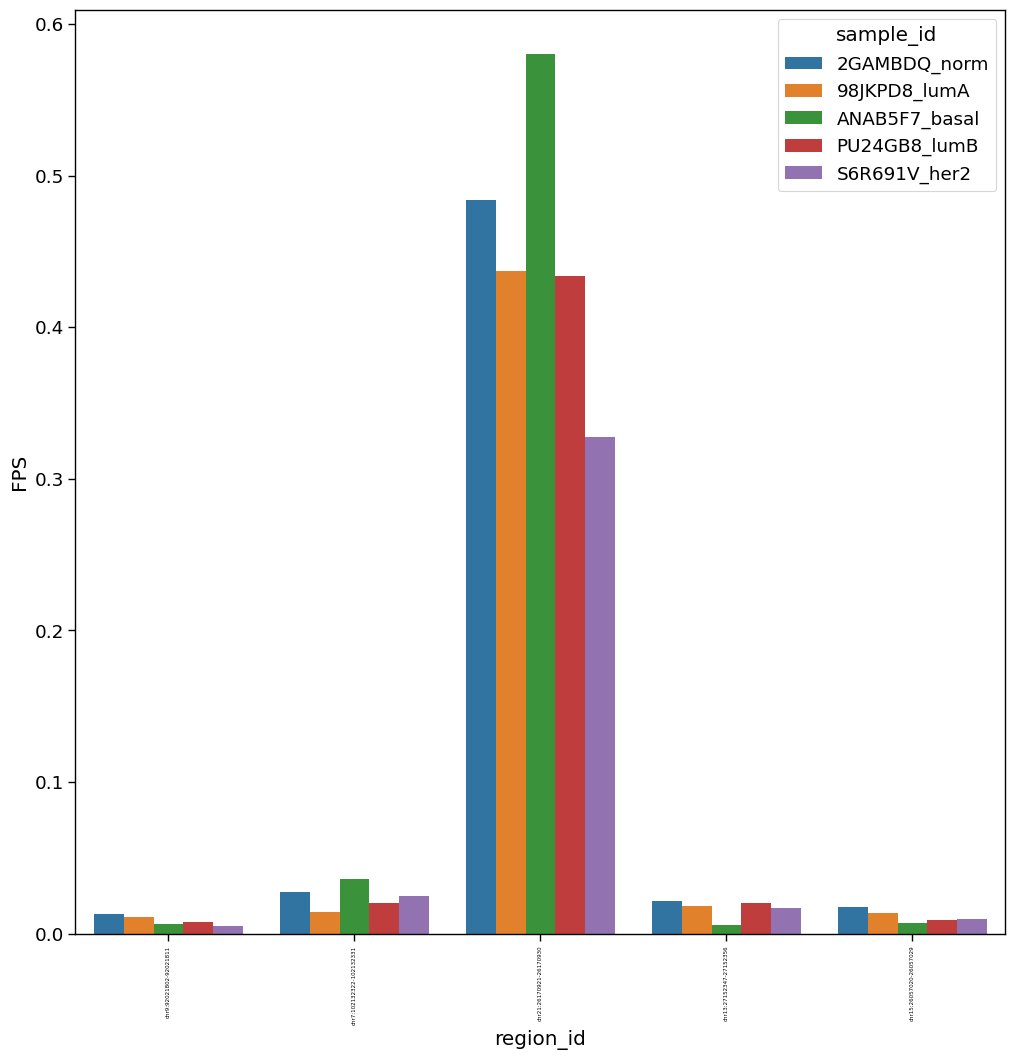

In [21]:
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(12, 12))
# draw line plot of FPS values across region IDs
sns.barplot(x='region_id', y='FPS', hue='sample_id', data=test_df, ax=ax)
plt.xticks(rotation=90, fontsize=4)
plt.show()

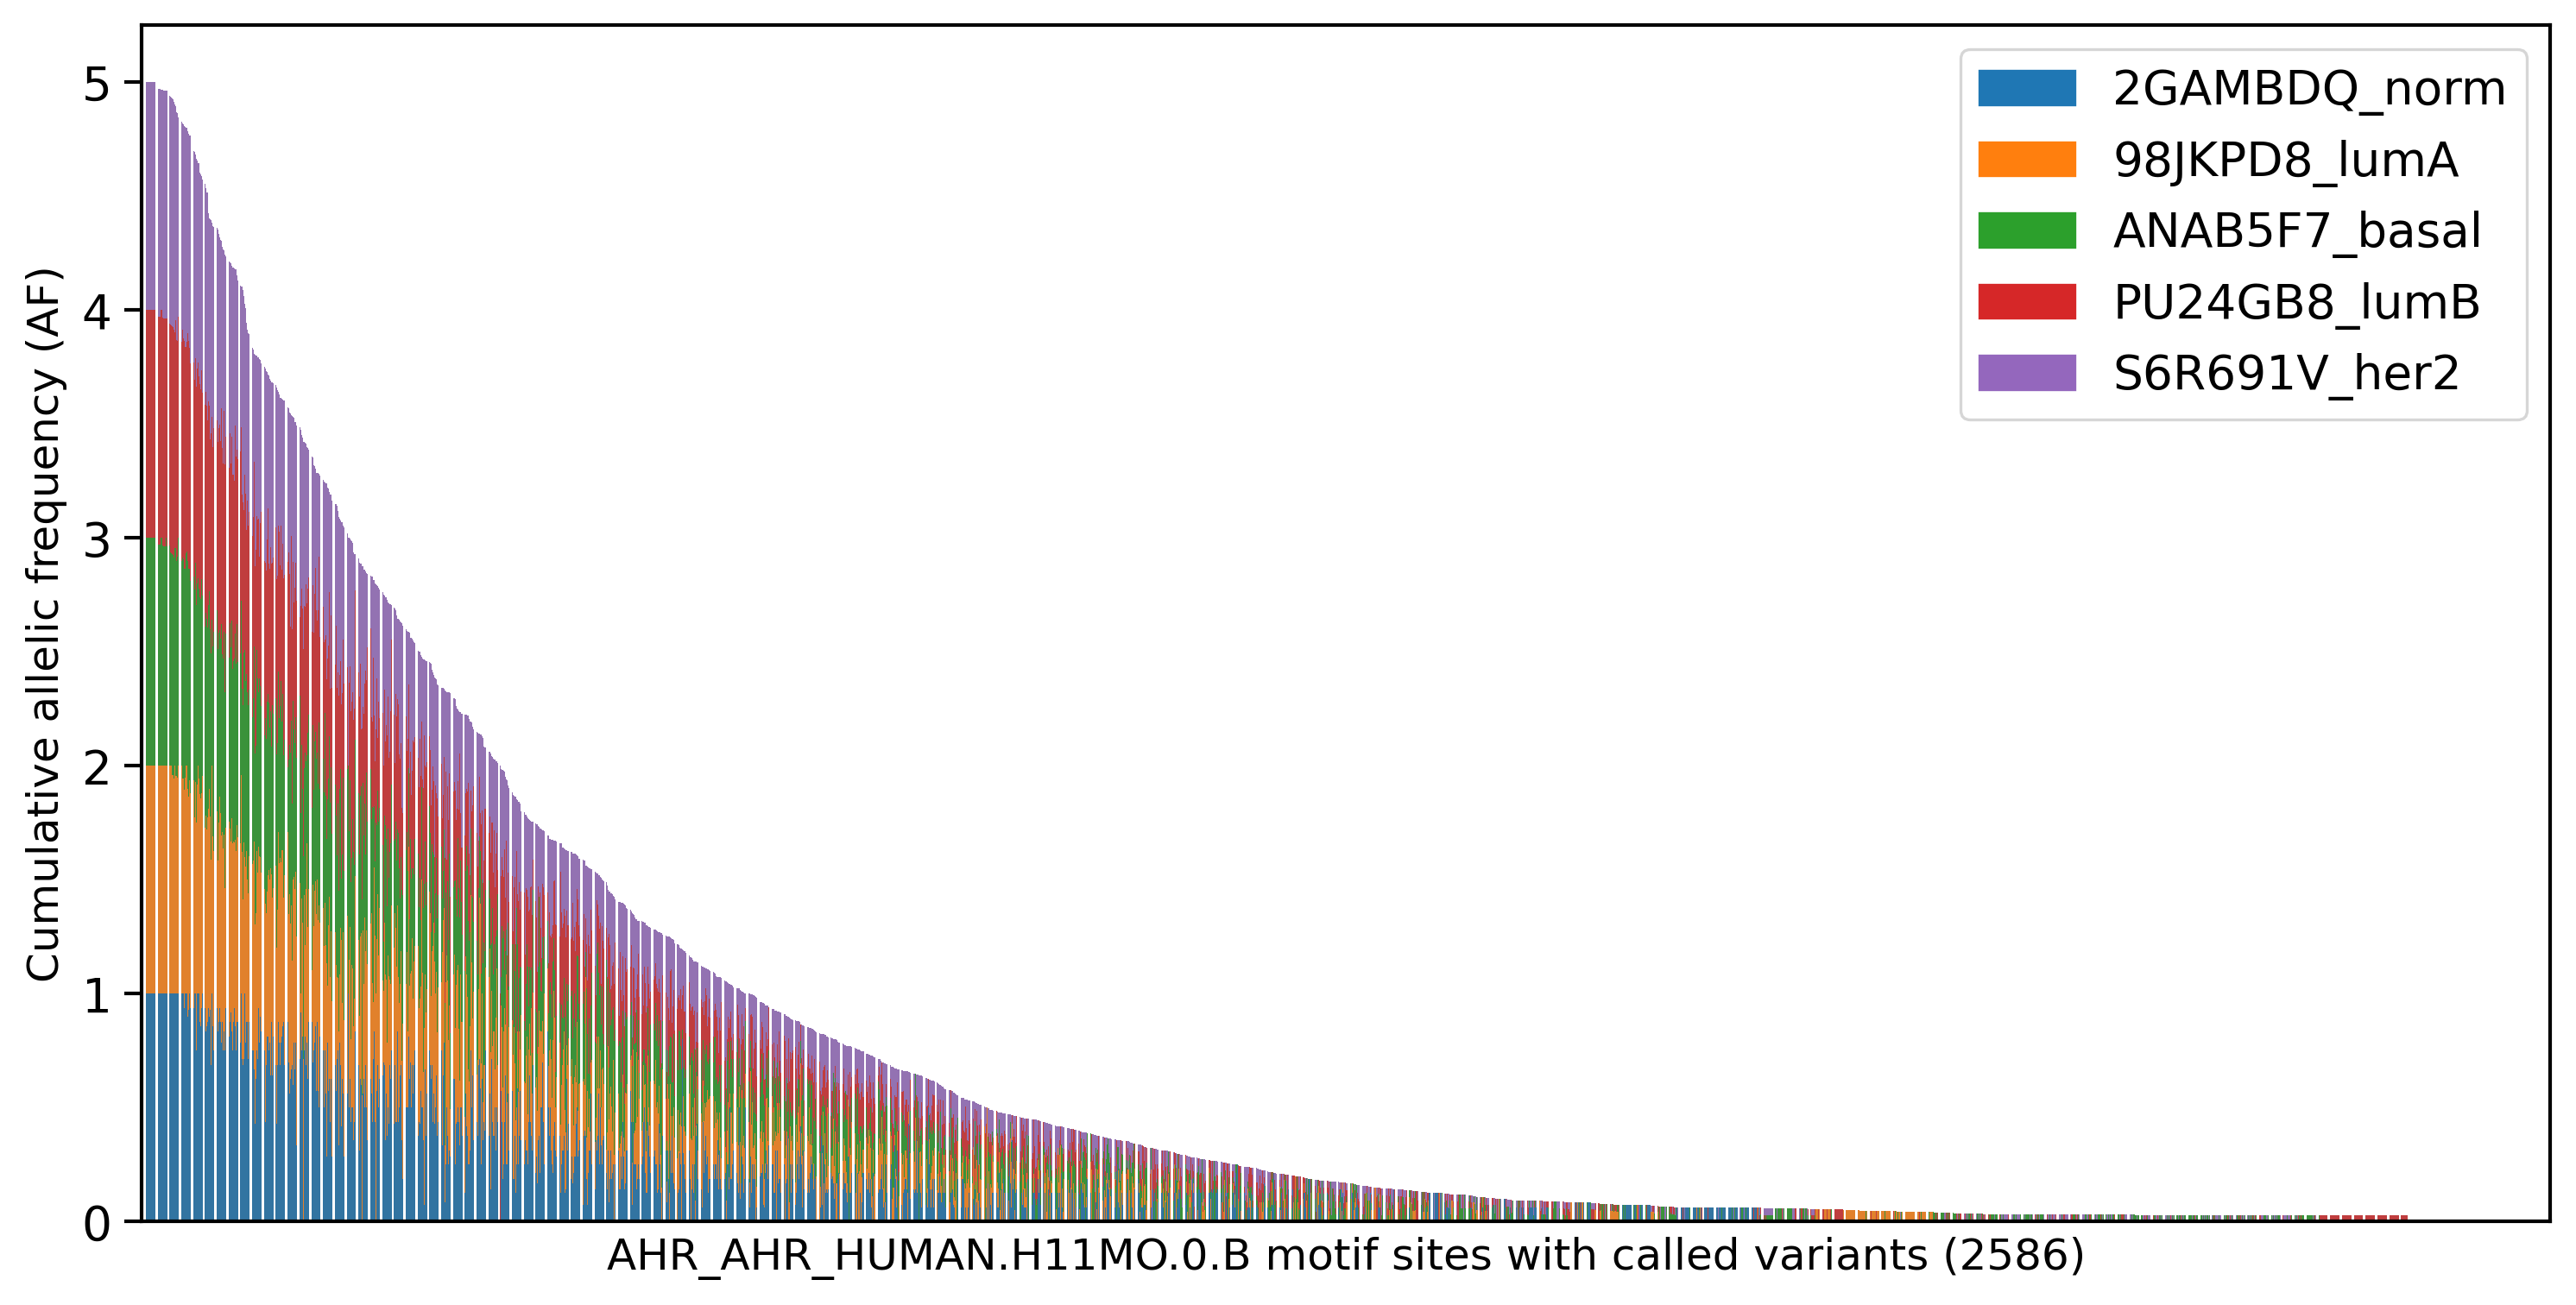

In [27]:
import matplotlib.patches as mpatches

# Get a list of unique 'sample_id' values
sample_ids = matrix_afps_regsorted['sample_id'].unique()

# plot the sorted stacked bar plot
plt.figure(figsize=(12,6), dpi=300)

# Initialize a zero array for the 'bottom' parameter of the bar plot
bottom = np.zeros(len(matrix_afps_regsorted['region_id'].unique()))

# For each 'sample_id'
for i, sample_id in enumerate(sample_ids):
    # Get the 'AF' values for this 'sample_id'
    data = matrix_afps_regsorted[matrix_afps_regsorted['sample_id'] == sample_id]

    # Create a bar plot for this 'sample_id', stacked on top of the previous one
    sns.barplot(data=data, x='region_id', y='AF', bottom=bottom, color=sns.color_palette()[i])

    # Update 'bottom' for the next 'sample_id'
    bottom += data['AF'].values

# Create a patch for each 'sample_id'
patches = [mpatches.Patch(color=sns.color_palette()[i], label=sample_id) for i, sample_id in enumerate(sample_ids)]

# Add the legend to the plot
plt.legend(handles=patches)

plt.xticks([])
plt.ylabel('Cumulative allelic frequency (AF)', fontsize=12)
plt.xlabel(f'{motif_id} motif sites with called variants ({matrix_afps_regsorted['region_id'].nunique()})', fontsize=12) 
plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/unfilt-barplots/{motif_id}_afps-barplot-unfilt.png', dpi=300, bbox_inches='tight')

In [42]:
# read in file
test_df = pd.read_csv('/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/AHR_AHR_HUMAN.H11MO.0.B_afps-trunc.txt', sep='\t')

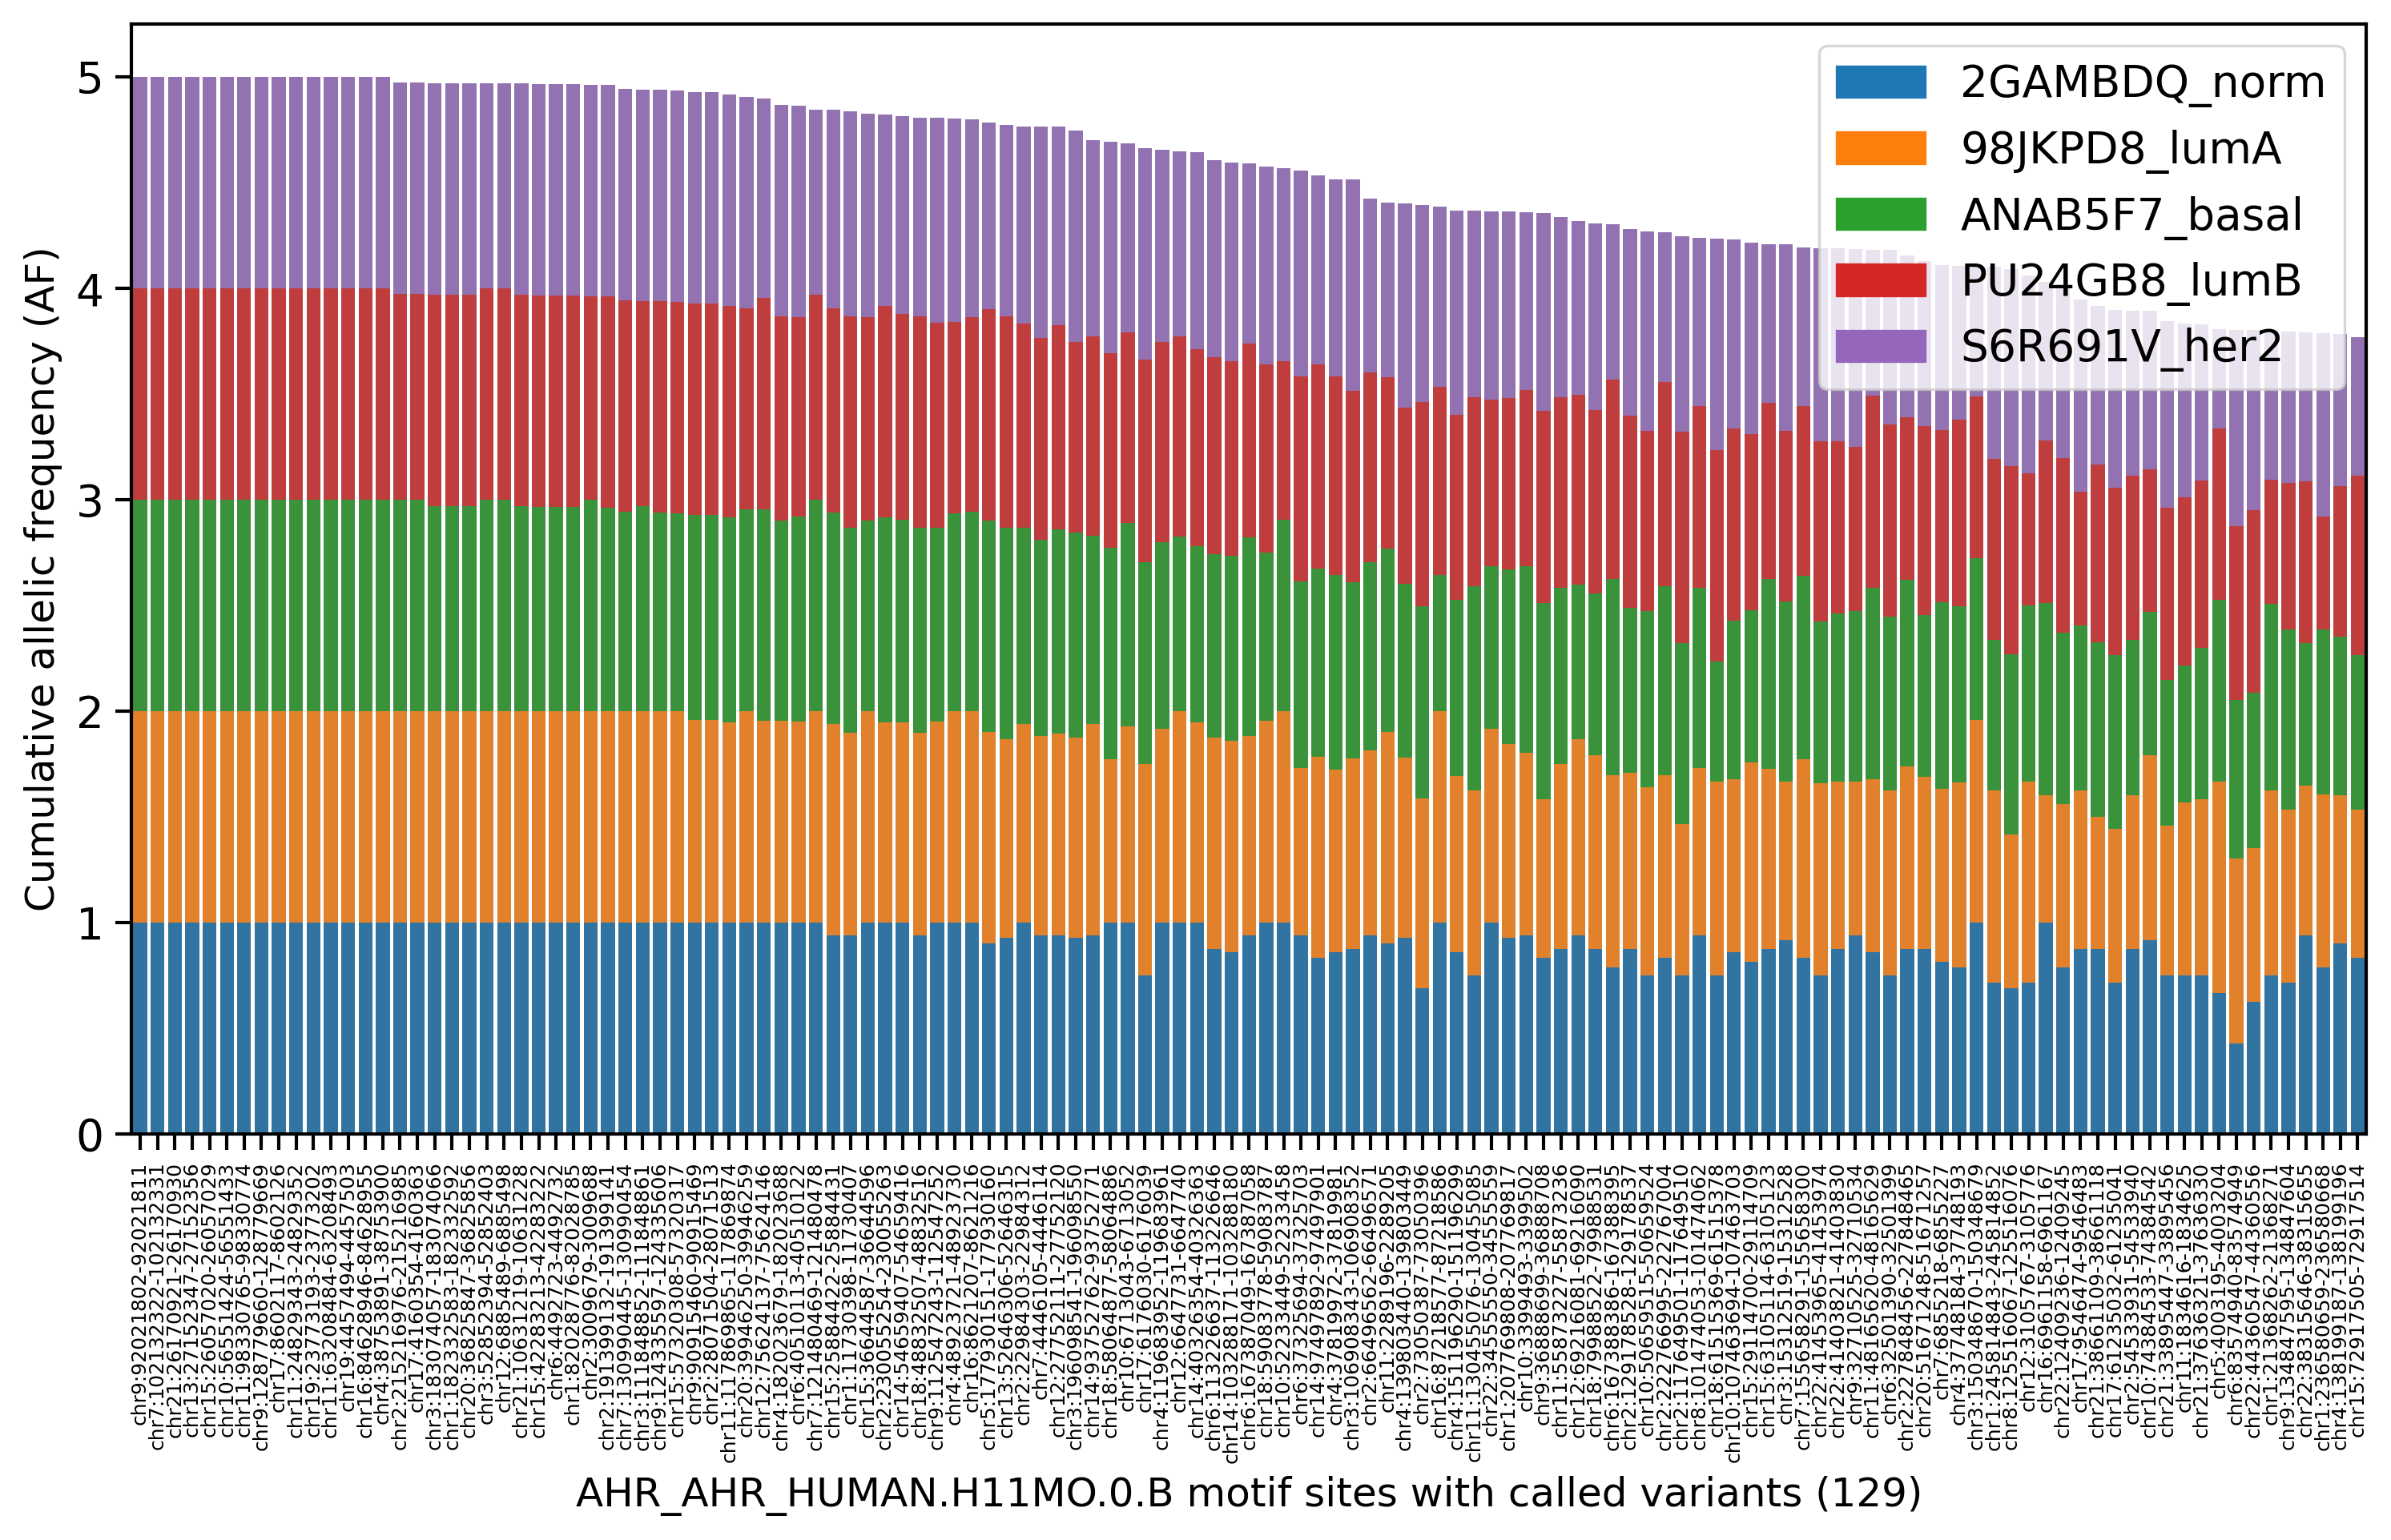

In [43]:
import matplotlib.patches as mpatches

# Get a list of unique 'sample_id' values
sample_ids = test_df['sample_id'].unique()

# plot the sorted stacked bar plot
plt.figure(figsize=(12,6), dpi=300)

# Initialize a zero array for the 'bottom' parameter of the bar plot
bottom = np.zeros(len(test_df['region_id'].unique()))

# For each 'sample_id'
for i, sample_id in enumerate(sample_ids):
    # Get the 'AF' values for this 'sample_id'
    data = test_df[test_df['sample_id'] == sample_id]

    # Create a bar plot for this 'sample_id', stacked on top of the previous one
    sns.barplot(data=data, x='region_id', y='AF', bottom=bottom, color=sns.color_palette()[i])

    # Update 'bottom' for the next 'sample_id'
    bottom += data['AF'].values

# Create a patch for each 'sample_id'
patches = [mpatches.Patch(color=sns.color_palette()[i], label=sample_id) for i, sample_id in enumerate(sample_ids)]

# Add the legend to the plot
plt.legend(handles=patches)

plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Cumulative allelic frequency (AF)', fontsize=12)
plt.xlabel(f'{motif_id} motif sites with called variants ({test_df['region_id'].nunique()})', fontsize=12) 
plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/test.png', dpi=300, bbox_inches='tight')

In [44]:
# truncate the dataframe to the first 5% of region_id values of all unique region_id values
matrix_afps_trunc = matrix_afps_regsorted.head(int(len(matrix_afps_regsorted['region_id'].unique())*0.05)*5)
matrix_afps_trunc.to_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/{motif_id}_afps-trunc.txt', sep='\t', index=False)
matrix_afps_trunc

,region_id,sample_id,AF,FPS
0,chr9:92021802-92021811,2GAMBDQ_norm,1.000000,0.01295
1,chr9:92021802-92021811,98JKPD8_lumA,1.000000,0.01087
2,chr9:92021802-92021811,ANAB5F7_basal,1.000000,0.00649
3,chr9:92021802-92021811,PU24GB8_lumB,1.000000,0.00759
4,chr9:92021802-92021811,S6R691V_her2,1.000000,0.00527
...,...,...,...,...
640,chr15:72917505-72917514,2GAMBDQ_norm,0.833333,0.01616
641,chr15:72917505-72917514,98JKPD8_lumA,0.700000,0.01120
642,chr15:72917505-72917514,ANAB5F7_basal,0.730769,0.00694
643,chr15:72917505-72917514,PU24GB8_lumB,0.850000,0.00707


In [45]:
matrix_afps_regsorted

,region_id,sample_id,AF,FPS
0,chr9:92021802-92021811,2GAMBDQ_norm,1.0,0.01295
1,chr9:92021802-92021811,98JKPD8_lumA,1.0,0.01087
2,chr9:92021802-92021811,ANAB5F7_basal,1.0,0.00649
3,chr9:92021802-92021811,PU24GB8_lumB,1.0,0.00759
4,chr9:92021802-92021811,S6R691V_her2,1.0,0.00527
...,...,...,...,...
12925,chr6:63163495-63163504,2GAMBDQ_norm,0.0,0.01484
12926,chr6:63163495-63163504,98JKPD8_lumA,0.0,0.01920
12927,chr6:63163495-63163504,ANAB5F7_basal,0.0,0.01069
12928,chr6:63163495-63163504,PU24GB8_lumB,0.0,0.00952


(-0.1, 1.1)

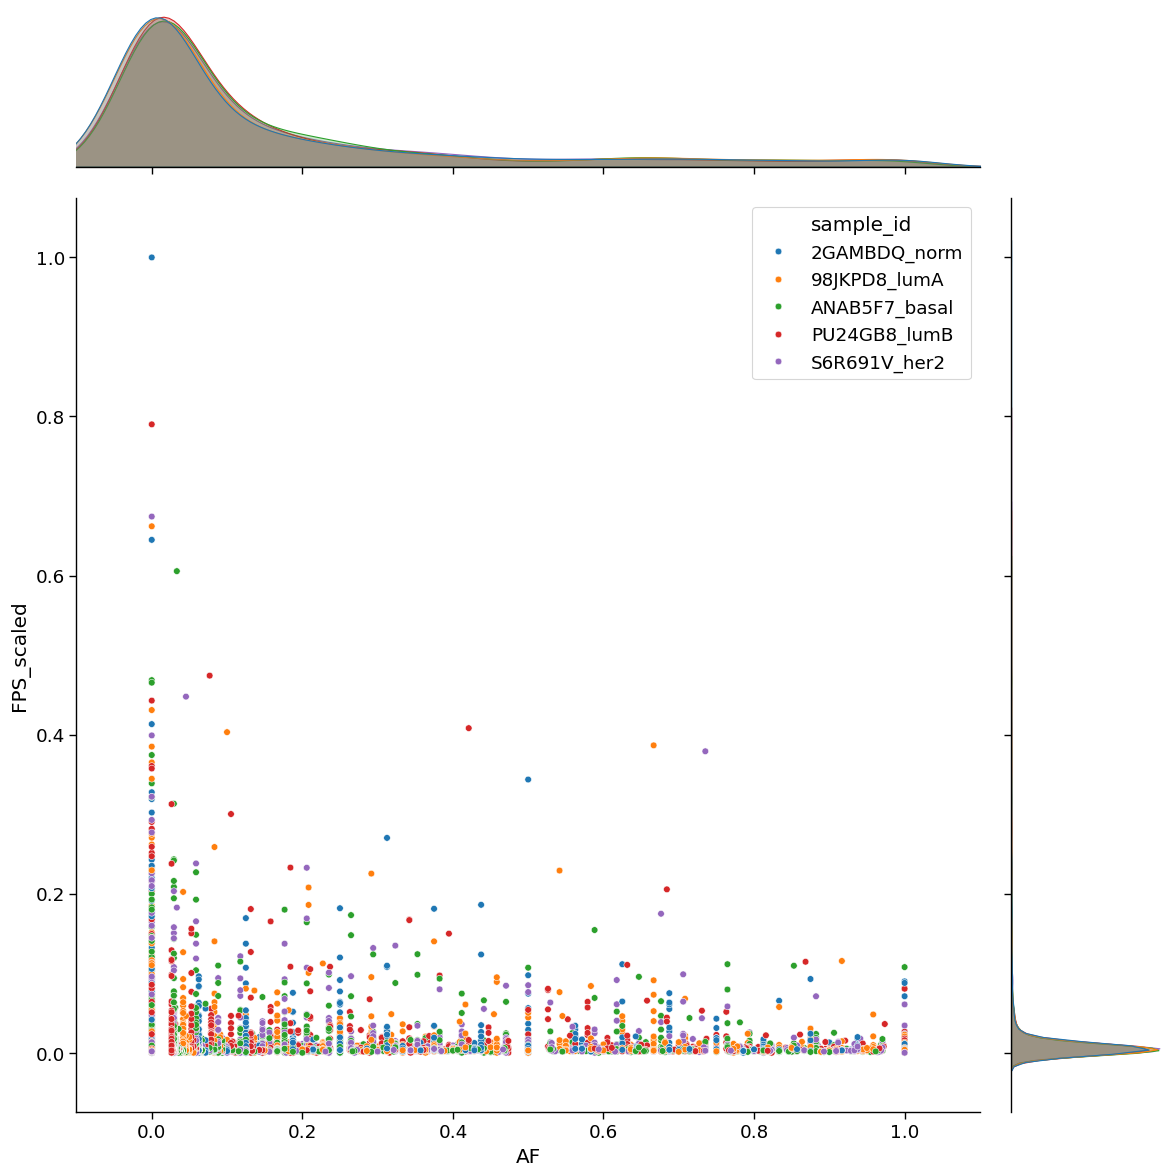

In [46]:
from sklearn.preprocessing import MinMaxScaler
# scale the AF and FPS values to a range of 0-1
# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit the MinMaxScaler to the 'FPS' column and transform it
matrix_afps_regsorted['FPS_scaled'] = scaler.fit_transform(matrix_afps_regsorted[['FPS']])

# Create a jointplot of 'AF' and 'FPS'
sns.jointplot(data=matrix_afps_regsorted, x='AF', y='FPS_scaled', kind='scatter', hue='sample_id', height=12)
plt.xlim(-0.1, 1.1)

In [47]:
matrix_afps_regsorted.describe()

,AF,FPS,FPS_scaled
count,12930.000000,12930.000000,12930.000000
mean,0.159406,0.062362,0.011571
std,0.255340,0.178975,0.033208
min,0.000000,0.000000,0.000000
25%,0.000000,0.015193,0.002819
50%,0.031250,0.022930,0.004255
75%,0.205882,0.042310,0.007850
max,1.000000,5.389510,1.000000


In [49]:
# filter out outliers using IQR method, but the inverse, where we retain the outliers and remove the inliers
# Calculate Q1, Q3 and IQR for the 'AF' column
Q1 = matrix_afps_regsorted['FPS_scaled'].quantile(0.25)
Q3 = matrix_afps_regsorted['FPS_scaled'].quantile(0.75)
# then filter the inliers
iqr_filtered_df = matrix_afps_regsorted[(matrix_afps_regsorted['AF'] > 0.5) & ((matrix_afps_regsorted['FPS_scaled'] <= Q1) | (matrix_afps_regsorted['FPS_scaled'] >= Q3))]
iqr_filtered_df

,region_id,sample_id,AF,FPS,FPS_scaled
0,chr9:92021802-92021811,2GAMBDQ_norm,1.000000,0.01295,0.002403
1,chr9:92021802-92021811,98JKPD8_lumA,1.000000,0.01087,0.002017
2,chr9:92021802-92021811,ANAB5F7_basal,1.000000,0.00649,0.001204
3,chr9:92021802-92021811,PU24GB8_lumB,1.000000,0.00759,0.001408
4,chr9:92021802-92021811,S6R691V_her2,1.000000,0.00527,0.000978
...,...,...,...,...,...
2492,chr17:79280143-79280152,ANAB5F7_basal,0.833333,0.01172,0.002175
2594,chr11:119592553-119592562,S6R691V_her2,0.531250,0.01445,0.002681
2634,chr1:37745716-37745725,S6R691V_her2,0.545455,0.00839,0.001557
2792,chr12:25815518-25815527,ANAB5F7_basal,0.545455,0.00782,0.001451


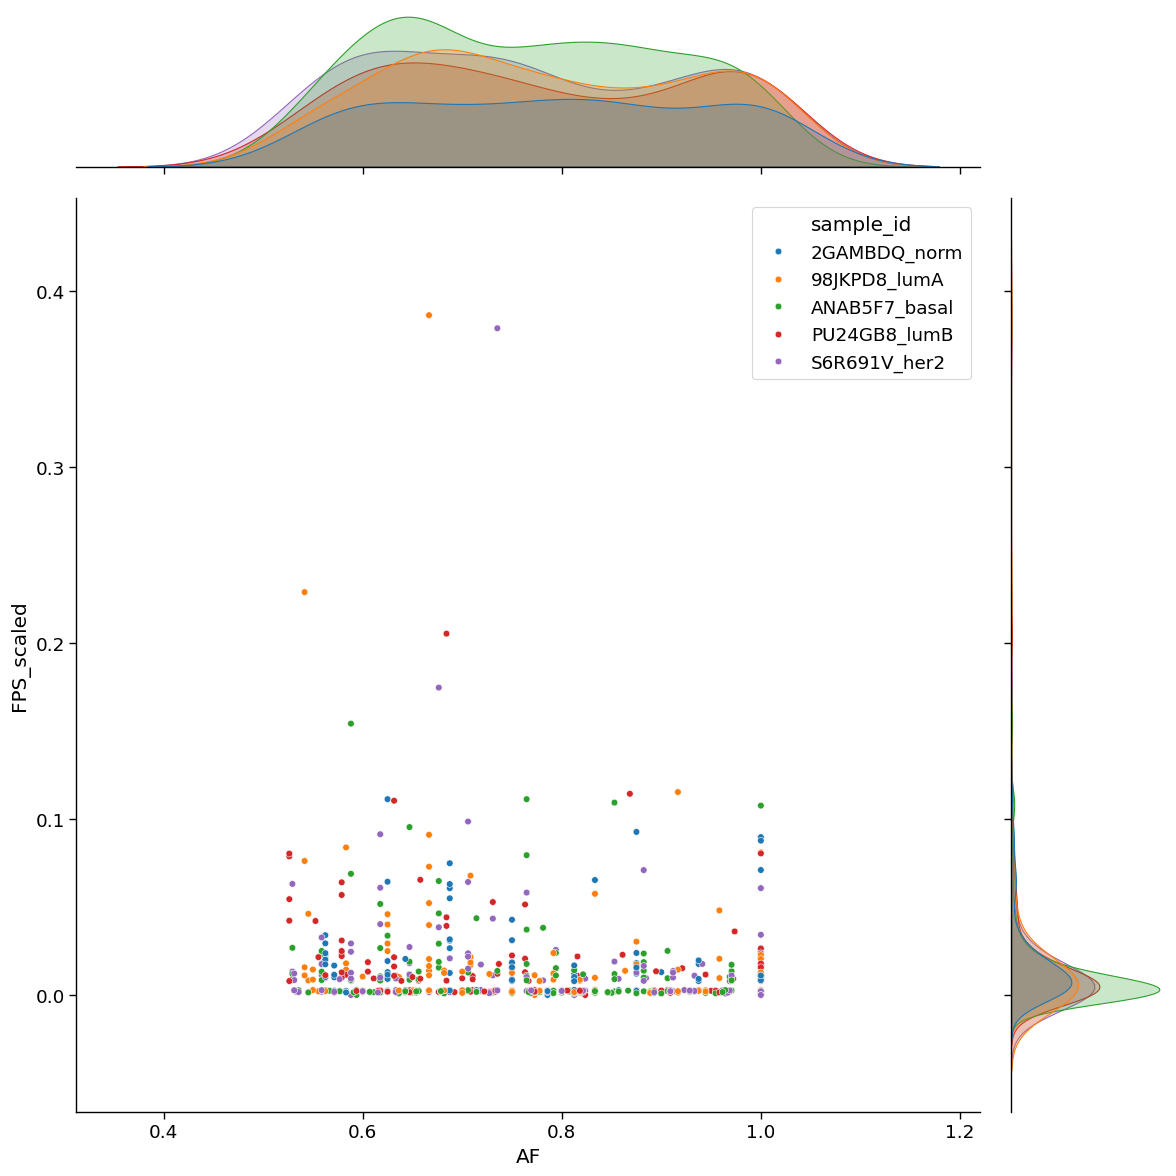

In [50]:
# plot jointplot of the filtered dataframe
sns.jointplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', kind='scatter', hue='sample_id', height=12)
plt.show()

In [55]:
filtered_sites_df = iqr_filtered_df.groupby('sample_id', observed=True)['region_id'].nunique().reset_index()
filtered_sites_df['motif_id'] = motif_id
filtered_sites_df

,sample_id,region_id,motif_id
0,2GAMBDQ_norm,109,AHR_AHR_HUMAN.H11MO.0.B
1,98JKPD8_lumA,158,AHR_AHR_HUMAN.H11MO.0.B
2,ANAB5F7_basal,196,AHR_AHR_HUMAN.H11MO.0.B
3,PU24GB8_lumB,152,AHR_AHR_HUMAN.H11MO.0.B
4,S6R691V_her2,171,AHR_AHR_HUMAN.H11MO.0.B


In [57]:
import glob

def process_input_tsv(root_dir):
    # Find all *.tsv files in root_dir
    tsv_files = glob.glob(f'{root_dir}/*.tsv')
    return tsv_files

test = process_input_tsv('/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix')
len(test)

1360